In [581]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [582]:
data=pd.read_csv('titanic_train.csv')
df=pd.DataFrame(data=data)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [583]:
df.drop(columns=['Ticket','Cabin','Name'],axis=1,inplace=True)

In [584]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [585]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

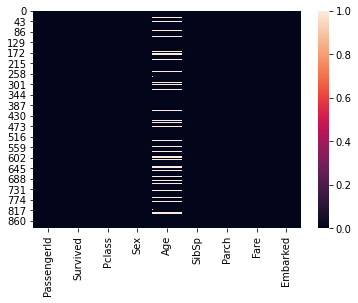

In [586]:
sns.heatmap(df.isnull())

In [587]:
x_df=df.iloc[:,0:8]
x_df=pd.DataFrame(data=x_df)
x_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [588]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
y=imp.fit_transform(y)
y

array([[2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [1],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [0],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
    

In [589]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y=pd.DataFrame(y)
y

,0
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


In [590]:
x_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [591]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
x_df['Age']=imp.fit_transform(x_df.Age.values.reshape(-1,1))

In [592]:
x_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [593]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_df['Sex']=le.fit_transform(x_df.Sex)
x_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000
887,888,1,1,0,19.000000,0,0,30.0000
888,889,0,3,0,29.699118,1,2,23.4500
889,890,1,1,1,26.000000,0,0,30.0000


In [594]:
y.isnull()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [595]:
x_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [596]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From above table we can observe that the columns Age,Sibsp and Parch has large difference between Q3 and Max also there is slight difference between mean and median but in case of Fare column there is extremely large difference between Q3 and max also there is large difference between mean and median(+ve skewed), so there are outliers present in these columns 

In [597]:
cor=x_df.corr()
cor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


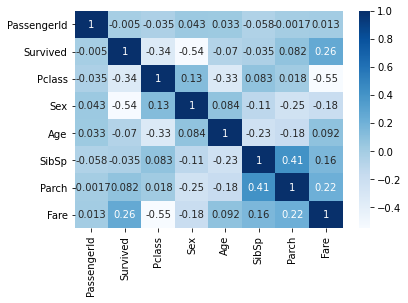

In [598]:
sns.heatmap(cor,cmap='Blues',annot=True)

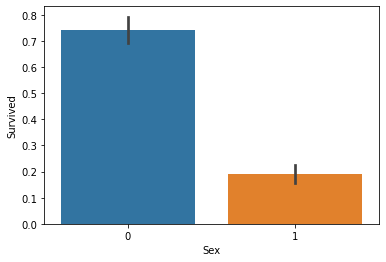

In [599]:
sns.barplot('Sex','Survived',data=x_df)

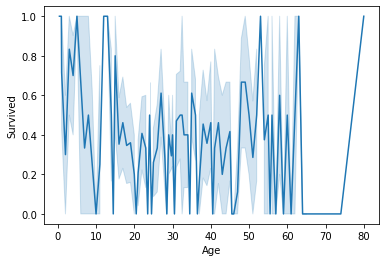

In [600]:
sns.lineplot(x='Age',y='Survived',data=x_df)

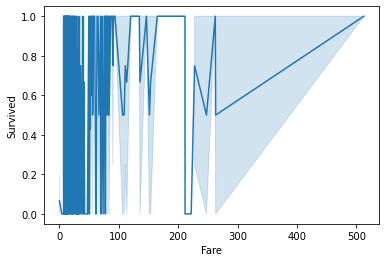

In [601]:
sns.lineplot(x='Fare',y='Survived',data=x_df)

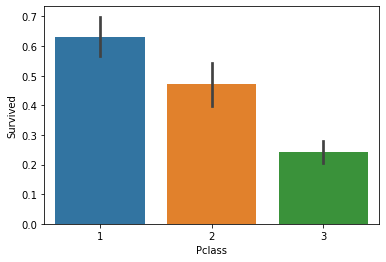

In [602]:
sns.barplot('Pclass','Survived',data=x_df)

In [603]:
x_df.drop(columns=['SibSp','Parch'],axis=1,inplace=True)

In [604]:
x_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
Fare           4.787317
dtype: float64

In [605]:
x_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [607]:
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x_df,y,random_state=r_state,test_size=0.20)
    rf=RandomForestClassifier()
    sv=SVC()
    dtc=DecisionTreeClassifier()
    kn=KNeighborsClassifier()
    gn=GaussianNB()
    model=[rf,sv,dtc,gn,kn]
    minimum_accuracy_score=0.8
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        if accuracy>minimum_accuracy_score:
            final_r_state=r_state
            print('max accuracy score corresponding to',final_r_state,'is',accuracy,'for',m)

max accuracy score corresponding to 43 is 0.8100558659217877 for RandomForestClassifier()
max accuracy score corresponding to 43 is 0.8100558659217877 for DecisionTreeClassifier()
max accuracy score corresponding to 44 is 0.8212290502793296 for DecisionTreeClassifier()
max accuracy score corresponding to 45 is 0.8212290502793296 for DecisionTreeClassifier()
max accuracy score corresponding to 49 is 0.8100558659217877 for DecisionTreeClassifier()
max accuracy score corresponding to 50 is 0.8212290502793296 for RandomForestClassifier()
max accuracy score corresponding to 50 is 0.8156424581005587 for DecisionTreeClassifier()
max accuracy score corresponding to 51 is 0.8044692737430168 for RandomForestClassifier()
max accuracy score corresponding to 57 is 0.8212290502793296 for DecisionTreeClassifier()
max accuracy score corresponding to 60 is 0.8212290502793296 for DecisionTreeClassifier()
max accuracy score corresponding to 61 is 0.8212290502793296 for DecisionTreeClassifier()
max accura

In [608]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=.20,random_state=84)

In [609]:
x_train.shape

(712, 6)

In [610]:
x_test.shape

(179, 6)

In [611]:
y_train.shape

(712, 1)

In [612]:
y_test.shape

(179, 1)

In [613]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_df,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.8148264390182662


In [620]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
grid_param={'n_estimators':range(1,100)}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_df,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'n_estimators': 59}
0.8204130311970372


In [616]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
preddtc=dtc.predict(x_test)
print('Accuracy score of',dtc,'is:')
print(accuracy_score(y_test,preddtc))
print('Confusion matrix of',dtc,'is:')
print(confusion_matrix(y_test,preddtc))

1.0
Accuracy score of DecisionTreeClassifier(criterion='entropy') is:
0.8268156424581006
Confusion matrix of DecisionTreeClassifier(criterion='entropy') is:
[[ 20   0  10]
 [  0  13   3]
 [ 12   6 115]]




In [627]:
rf=RandomForestClassifier(n_estimators=59)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('Accuracy score of',rf,'is:')
print(accuracy_score(y_test,predrf))
print('Confusion matrix of',rf,'is:')
print(confusion_matrix(y_test,predrf))

1.0
Accuracy score of RandomForestClassifier(n_estimators=59) is:
0.8156424581005587
Confusion matrix of RandomForestClassifier(n_estimators=59) is:
[[ 13   0  17]
 [  0   9   7]
 [  6   3 124]]


In [628]:
from sklearn.model_selection import cross_val_score
dtcscores=cross_val_score(dtc,x_df,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.80446927 0.80898876 0.76966292 0.79213483 0.83146067]
0.8013432929508506 0.020316118442208563


In [629]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x_df,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.76536313 0.80337079 0.83707865 0.81460674 0.79213483]
0.802510827945515 0.023789064593255593


In [630]:
import joblib
joblib.dump(dtc,'filesv.pkl')
homefile=joblib.load('filesv.pkl')
homefile.predict(x_test)

array([2, 2, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2,
       2, 2, 2], dtype=int64)

# Conclusion - From above data analysis,modeling and hyperparameter tuning it was observed that DTC model was performing good in accuracy as well as cross validation, so I saved DTC model for future prediction